In [1]:
import tensorflow as tf

In [2]:
w = tf.Variable(2.)

def f(w):
    y = w**2
    z = 2*y + 5
    return z

In [3]:
with tf.GradientTape() as tape:
    z = f(w)
gradients = tape.gradient(z, [w])
print(gradients)

[<tf.Tensor: shape=(), dtype=float32, numpy=8.0>]


In [4]:
# 자동 미분을 이용한 선형 회귀 구현
# 학습될 가중치 변수를 선언

W = tf.Variable(4.0)
b = tf.Variable(1.0)

In [5]:
@tf.function
def hypothesis(x):
    return W*x + b

In [6]:
x_test = [3.5, 5, 5.5, 6]
print(hypothesis(x_test).numpy())

[15. 21. 23. 25.]


In [7]:
# 평균 제곱 오차를 손실 함수로서 정의
def mse_loss(y_pred, y):
    return tf.reduce_mean(tf.square(y_pred - y))

In [8]:
X = [1,2,3,4,5,6,7,8,9]
y = [11,22,33,44,53,66,77,87,95]

In [9]:
optimizer = tf.optimizers.SGD(0.01)

In [10]:
# 300번에 걸쳐서 경사 하강법 수행
for i in range(301):
    with tf.GradientTape() as tape:
        # 현재 파라미터에 기반한 입력 x에 대한 예측값을 y_pred
        y_pred = hypothesis(X)
        
        # 평균 제곱 오차를 계산
        cost = mse_loss(y_pred, y)
        
    # 손실 함수에 대한 파라미터의 미분값 계산 기울기?
    gradients = tape.gradient(cost, [W, b])
    
    # 파라미터 업데이트
    optimizer.apply_gradients(zip(gradients, [W, b]))
    
    if i % 10 == 0:
        print("epoch : {:3} | W의 값 : {:5.4f} | b의 값 : {:5.4} | cost : {:5.6f}".format
             (i, W.numpy(), b.numpy(), cost))

epoch :   0 | W의 값 : 8.2133 | b의 값 : 1.664 | cost : 1402.555542
epoch :  10 | W의 값 : 10.4971 | b의 값 : 1.977 | cost : 1.351182
epoch :  20 | W의 값 : 10.5047 | b의 값 :  1.93 | cost : 1.328163
epoch :  30 | W의 값 : 10.5119 | b의 값 : 1.884 | cost : 1.306966
epoch :  40 | W의 값 : 10.5188 | b의 값 : 1.841 | cost : 1.287436
epoch :  50 | W의 값 : 10.5254 | b의 값 : 1.799 | cost : 1.269459
epoch :  60 | W의 값 : 10.5318 | b의 값 : 1.759 | cost : 1.252897
epoch :  70 | W의 값 : 10.5379 | b의 값 : 1.721 | cost : 1.237644
epoch :  80 | W의 값 : 10.5438 | b의 값 : 1.684 | cost : 1.223597
epoch :  90 | W의 값 : 10.5494 | b의 값 : 1.648 | cost : 1.210658
epoch : 100 | W의 값 : 10.5548 | b의 값 : 1.614 | cost : 1.198740
epoch : 110 | W의 값 : 10.5600 | b의 값 : 1.582 | cost : 1.187767
epoch : 120 | W의 값 : 10.5650 | b의 값 :  1.55 | cost : 1.177665
epoch : 130 | W의 값 : 10.5697 | b의 값 :  1.52 | cost : 1.168354
epoch : 140 | W의 값 : 10.5743 | b의 값 : 1.492 | cost : 1.159782
epoch : 150 | W의 값 : 10.5787 | b의 값 : 1.464 | cost : 1.151890
epoch 

In [11]:
# 임의 입력을 넣고 예측값 확인
x_test = [3.5, 5, 5.5, 6]
print(hypothesis(x_test).numpy())

[38.35479  54.295143 59.608593 64.92204 ]


In [12]:
# 케라스로 구현하는 선형 회귀
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

In [13]:
X = [1,2,3,4,5,6,7,8,9]
Y = [11,22,33,44,53,66,77,87,95]

model = Sequential()

# 입력 x의 차원은 1, 출력 y의 차원도 1, 선형 회귀이므로, activation은 'linear'
model.add(Dense(1, input_dim = 1, activation = 'linear'))

# sgd는 경사 하강법을 의미, 학습률 (learning rate, 1r)은 0/01
sgd = optimizers.SGD(lr = 0.01)

# 손실 함수(Loss function)은 평균제곱오차 mse를 사용
model.compile(optimizer=sgd, loss='mse', metrics=['mse'])

# 주어진 X와 y의 데이터에 대해서 오차를 최소화하는 작업을 300번 시도
model.fit(X,y, batch_size = 1, epochs=300, shuffle=False)

Epoch 1/300
9/9 [==============================] - 2s 5ms/step - loss: 434.6378 - mse: 434.6378
Epoch 2/300
9/9 [==============================] - 0s 3ms/step - loss: 2.0135 - mse: 2.0135
Epoch 3/300
9/9 [==============================] - 0s 5ms/step - loss: 2.0021 - mse: 2.0021
Epoch 4/300
9/9 [==============================] - 0s 3ms/step - loss: 1.9911 - mse: 1.9911
Epoch 5/300
9/9 [==============================] - 0s 3ms/step - loss: 1.9806 - mse: 1.9806
Epoch 6/300
9/9 [==============================] - 0s 3ms/step - loss: 1.9704 - mse: 1.9704
Epoch 7/300
9/9 [==============================] - 0s 3ms/step - loss: 1.9607 - mse: 1.9607
Epoch 8/300
9/9 [==============================] - 0s 3ms/step - loss: 1.9513 - mse: 1.9513
Epoch 9/300
9/9 [==============================] - 0s 3ms/step - loss: 1.9423 - mse: 1.9423
Epoch 10/300
9/9 [==============================] - 0s 3ms/step - loss: 1.9337 - mse: 1.9337
Epoch 11/300
9/9 [==============================] - 0s 3ms/step - loss: 1.9

9/9 [==============================] - 0s 3ms/step - loss: 1.7147 - mse: 1.7147
Epoch 89/300
9/9 [==============================] - 0s 3ms/step - loss: 1.7142 - mse: 1.7142
Epoch 90/300
9/9 [==============================] - 0s 3ms/step - loss: 1.7136 - mse: 1.7136
Epoch 91/300
9/9 [==============================] - 0s 3ms/step - loss: 1.7132 - mse: 1.7132
Epoch 92/300
9/9 [==============================] - 0s 3ms/step - loss: 1.7127 - mse: 1.7127
Epoch 93/300
9/9 [==============================] - 0s 3ms/step - loss: 1.7122 - mse: 1.7122
Epoch 94/300
9/9 [==============================] - 0s 3ms/step - loss: 1.7118 - mse: 1.7118
Epoch 95/300
9/9 [==============================] - 0s 3ms/step - loss: 1.7113 - mse: 1.7113
Epoch 96/300
9/9 [==============================] - 0s 3ms/step - loss: 1.7109 - mse: 1.7109
Epoch 97/300
9/9 [==============================] - 0s 3ms/step - loss: 1.7105 - mse: 1.7105
Epoch 98/300
9/9 [==============================] - 0s 3ms/step - loss: 1.7101 - ms

9/9 [==============================] - 0s 3ms/step - loss: 1.6996 - mse: 1.6996
Epoch 176/300
9/9 [==============================] - 0s 3ms/step - loss: 1.6996 - mse: 1.6996
Epoch 177/300
9/9 [==============================] - 0s 3ms/step - loss: 1.6995 - mse: 1.6995
Epoch 178/300
9/9 [==============================] - 0s 3ms/step - loss: 1.6995 - mse: 1.6995
Epoch 179/300
9/9 [==============================] - 0s 3ms/step - loss: 1.6995 - mse: 1.6995
Epoch 180/300
9/9 [==============================] - ETA: 0s - loss: 2.5253 - mse: 2.525 - 0s 3ms/step - loss: 1.6995 - mse: 1.6995
Epoch 181/300
9/9 [==============================] - 0s 3ms/step - loss: 1.6994 - mse: 1.6994
Epoch 182/300
9/9 [==============================] - 0s 3ms/step - loss: 1.6994 - mse: 1.6994
Epoch 183/300
9/9 [==============================] - 0s 5ms/step - loss: 1.6994 - mse: 1.6994
Epoch 184/300
9/9 [==============================] - 0s 5ms/step - loss: 1.6994 - mse: 1.6994
Epoch 185/300
9/9 [=================

9/9 [==============================] - 0s 3ms/step - loss: 1.6988 - mse: 1.6988
Epoch 262/300
9/9 [==============================] - 0s 3ms/step - loss: 1.6988 - mse: 1.6988
Epoch 263/300
9/9 [==============================] - 0s 3ms/step - loss: 1.6988 - mse: 1.6988
Epoch 264/300
9/9 [==============================] - 0s 3ms/step - loss: 1.6988 - mse: 1.6988
Epoch 265/300
9/9 [==============================] - 0s 3ms/step - loss: 1.6988 - mse: 1.6988
Epoch 266/300
9/9 [==============================] - 0s 3ms/step - loss: 1.6988 - mse: 1.6988
Epoch 267/300
9/9 [==============================] - 0s 3ms/step - loss: 1.6988 - mse: 1.6988
Epoch 268/300
9/9 [==============================] - 0s 3ms/step - loss: 1.6988 - mse: 1.6988
Epoch 269/300
9/9 [==============================] - 0s 3ms/step - loss: 1.6988 - mse: 1.6988
Epoch 270/300
9/9 [==============================] - 0s 3ms/step - loss: 1.6988 - mse: 1.6988
Epoch 271/300
9/9 [==============================] - 0s 3ms/step - loss: 1

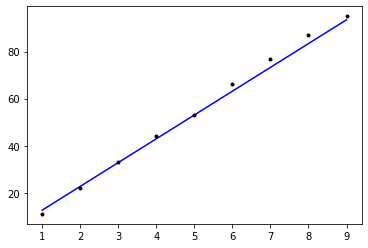

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(X, model.predict(X), 'b', X,y, 'k.')

In [15]:
print(model.predict([9.5]))

[[98.556465]]
